# SuppFigure 13-14: Specify the Correct Demographic Model

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import scipy.stats as stats 
from matplotlib.lines import Line2D

## Load the Data

In [23]:
syn_theta_data={'Neutral': {'1': 5770.831556694766, '2': 5679.159790871198, '3': 5251.399303239752, '4': 5551.33828762317, '5': 5734.903900062512, '6': 5758.2761928179025, '7': 5777.7852966881055, '8': 5769.28628114069, '9': 5447.816744184638, '10': 5729.109116734729, '11': 5689.511430661545, '12': 5576.902877337449, '13': 5623.517371885801, '14': 5699.748881207295, '15': 5711.917926195639, '16': 5740.505523946035, '17': 5703.998388980776, '18': 5800.384951666459, '19': 5724.473290072276, '20': 5652.617976807994}, 
                'E4': {'1': 1503.3277661614686, '2': 1739.8902170971123, '3': 1442.2508861987671, '4': 1714.067882319712, '5': 1893.924175635029, '6': 2055.8495414732797, '7': 1821.2508041229773, '8': 2111.243219321488, '9': 1606.8291493319434, '10': 1573.4761940287922, '11': 1614.547862606907, '12': 1626.7775644354263, '13': 1815.4597423459818, '14': 1884.0917824507503, '15': 1948.9691816792017, '16': 1644.9196010247454, '17': 1511.4208313151637, '18': 1851.6581136880136, '19': 1698.4150780401912, '20': 1857.063152414975}, 
                'E3': {'1': 1.9335325662026908, '2': 1.9359687191392785, '3': 1.922266927702268, '4': 2.2227733887266115, '5': 2.8361145532125063, '6': 1.9165786198955783, '7': 2.1419922824899915, '8': 1.9315837676996643, '9': 2.0901827188322515, '10': 2.038560781411968, '11': 2.4654926432635884, '12': 1.976115827711576, '13': 2.4937981990243863, '14': 1.9280414321429369, '15': 1.9333865130386179, '16': 2.0547053019879082, '17': 1.967324043141496, '18': 2.5191325337011747, '19': 2.0244803443503128, '20': 2.482519031450116}, 
                'E5': {'1': 5310.9635625882565, '2': 4469.948167436728, '3': 5267.400201941446, '4': 5155.602835021811, '5': 5191.176613939037, '6': 5167.940613465972, '7': 3588.121082787052, '8': 4348.172337303504, '9': 5207.281063240058, '10': 5131.199877784881, '11': 4346.731525532607, '12': 848.5835826389638, '13': 4791.692075509972, '14': 5415.899990249632, '15': 1189.5443980205903, '16': 4813.979543003429, '17': 5250.070283617126, '18': 5403.168623226593, '19': 4970.95745589056, '20': 5112.5350858560905}, 
                'E5_Partial': {'1': 5393.689750159972, '2': 5686.420879553394, '3': 5680.046617892833, '4': 5397.847082667908, '5': 1050.3134359384946, '6': 5494.2211379213, '7': 5093.210183836459, '8': 5782.614282794361, '9': 5645.388947648372, '10': 5730.074913955798, '11': 5669.036529570046, '12': 5680.626096225386, '13': 5529.915573539463, '14': 5677.7287045617195, '15': 5355.167318091468, '16': 5454.942700242703, '17': 5720.803260631573, '18': 5488.034993943788, '19': 5675.990269563385, '20': 942.7291152999991}, 
                'E3_Partial': {'1': 4391.577203674086, '2': 4322.001860802991, '3': 4303.839146636993, '4': 4424.6156985418265, '5': 4267.768044743032, '6': 4373.608625868483, '7': 4436.339698993257, '8': 4408.112316419042, '9': 4410.941268286445, '10': 4447.755410813714, '11': 4377.680658499566, '12': 4431.931278314434, '13': 4397.385093498345, '14': 4455.1549947673175, '15': 4356.032621252616, '16': 4441.811082776953, '17': 4465.211538618771, '18': 4340.597393345542, '19': 4335.306876103004, '20': 4354.511099091319}, 
                'E4_Partial': {'1': 4837.521981238725, '2': 4722.4699909107385, '3': 4811.923438249552, '4': 5108.591370072904, '5': 4359.754024662157, '6': 4995.430177323818, '7': 4854.858403160825, '8': 4849.685965076534, '9': 4881.341339597723, '10': 4467.748344354185, '11': 5058.674493908847, '12': 4709.489182532087, '13': 5125.8503383870575, '14': 4947.2668668892575, '15': 4580.70274192427, '16': 4448.090252387428, '17': 5116.489099528451, '18': 4765.952313682789, '19': 4839.484068159702, '20': 4713.617473061899}, 
                'E5ZeroSyn': {'1': 5770.831556694766, '2': 5680.030757589384, '3': 5295.537729143938, '4': 5551.552968734763, '5': 5734.903900062512, '6': 5758.2761928179025, '7': 5777.7852966881055, '8': 5769.286281140461, '9': 5447.959271872128, '10': 5729.109116734729, '11': 5689.511430661545, '12': 5576.847593189188, '13': 5623.4248623555595, '14': 5699.748881207069, '15': 5711.917926195639, '16': 5740.505523946035, '17': 5703.998388981003, '18': 5800.384951666459, '19': 5724.473290072502, '20': 5652.61797680777}, 
                'E5Partial_ZeroSyn': {'1': 5770.831556694766, '2': 5679.847840484687, '3': 5279.354124590857, '4': 5551.292695320344, '5': 5734.903900062284, '6': 5758.276192817674, '7': 5777.785296687876, '8': 5769.286281140461, '9': 5450.0799882493175, '10': 5729.109116734501, '11': 5689.5114306613195, '12': 5576.655637578551, '13': 5623.599824001768, '14': 5699.748881207295, '15': 5711.917926195639, '16': 5740.505523946035, '17': 5703.998388981003, '18': 5800.3849516662285, '19': 5724.473290072502, '20': 5652.61797680777}, 
                'E4ZeroSyn': {'1': 5770.831556694766, '2': 5679.264980670725, '3': 5278.83400425839, '4': 5551.148998447817, '5': 5734.903900062284, '6': 5758.2761928179025, '7': 5777.7852966881055, '8': 5769.28628114069, '9': 5449.515917130774, '10': 5729.109116734729, '11': 5689.511430661545, '12': 5576.601270989777, '13': 5622.876841855337, '14': 5699.748881207069, '15': 5711.917926195413, '16': 5740.505523946035, '17': 5703.998388981003, '18': 5800.384951666459, '19': 5724.473290072502, '20': 5652.61797680777}, 
                'E4Partial_ZeroSyn': {'1': 5770.831556694766, '2': 5679.315852566523, '3': 5266.472018002851, '4': 5549.913794248361, '5': 5734.903900062512, '6': 5758.2761928179025, '7': 5777.7852966881055, '8': 5769.28628114069, '9': 5447.294234456018, '10': 5729.109116734729, '11': 5689.511430661545, '12': 5576.7958622090455, '13': 5623.934383254429, '14': 5699.748881207295, '15': 5711.917926195639, '16': 5740.505523945807, '17': 5703.998388981003, '18': 5800.384951666459, '19': 5724.473290072502, '20': 5652.617976807994}, 
                'E3ZeroSyn': {'1': 5770.831556694766, '2': 5680.246909071884, '3': 5295.84909470983, '4': 5551.349339223679, '5': 5734.903900062512, '6': 5758.276192817674, '7': 5777.7852966881055, '8': 5769.28628114069, '9': 5446.702491523396, '10': 5729.109116734729, '11': 5689.5114306613195, '12': 5576.619651892444, '13': 5624.532721176386, '14': 5699.748881207069, '15': 5711.917926195413, '16': 5740.505523946035, '17': 5703.998388981003, '18': 5800.384951666459, '19': 5724.473290072502, '20': 5652.617976807994}, 
                'E3Partial_ZeroSyn': {'1': 5770.831556694766, '2': 5679.254346763795, '3': 5257.739238629922, '4': 5550.945662191728, '5': 5734.903900062512, '6': 5758.276192817674, '7': 5777.7852966881055, '8': 5769.286281140461, '9': 5450.027290850302, '10': 5729.109116734501, '11': 5689.511430661545, '12': 5576.999065492677, '13': 5623.643971815068, '14': 5699.748881207069, '15': 5711.917926195639, '16': 5740.505523946035, '17': 5703.998388980776, '18': 5800.384951666459, '19': 5724.473290072502, '20': 5652.617976807994}}                

In [24]:
dfe_parameters_data={'Neutral': {'1': [0.193644799, 589.255658], '2': [0.177894713, 846.027542], '3': [0.180493097, 698.796128], '4': [0.182655171, 757.892613], '5': [0.187581251, 692.387833], '6': [0.190756644, 640.277876], '7': [0.194293489, 619.600853], '8': [0.187207264, 670.497746], '9': [0.175330807, 933.08087], '10': [0.183189668, 692.886405], '11': [0.191891943, 586.558254], '12': [0.18118518, 765.663799], '13': [0.184923228, 753.859443], '14': [0.193173329, 582.479029], '15': [0.190215957, 605.360699], '16': [0.197617323, 513.965619], '17': [0.191500659, 601.211055], '18': [0.190159779, 646.973511], '19': [0.182929261, 725.484684], '20': [0.194295378, 534.141822]}, 
                     'E4': {'1': [0.0547699365, 149044.666], '2': [0.067157023, 25902.6375], '3': [0.0658182858, 22957.2355], '4': [0.0584550685, 94570.2965], '5': [0.0561711886, 156757.633], '6': [0.0691580322, 28786.0008], '7': [0.067200905, 24332.4762], '8': [0.0609637355, 75668.6426], '9': [0.0592451638, 70139.0446], '10': [0.0561160259, 133484.32], '11': [0.0646691593, 30371.8402], '12': [0.056615294, 141816.578], '13': [0.0628009921, 51956.2024], '14': [0.0511350117, 464146.116], '15': [0.0597011494, 73663.2888], '16': [0.0550294669, 171547.049], '17': [0.063027786, 37330.376], '18': [0.0648600286, 33616.5828], '19': [0.0597146949, 66703.0563], '20': [0.0676387523, 25789.1612]}, 
                     'E3': {}, 
                     'E5': {'1': [0.17044207, 962.571049], '2': [0.174740388, 671.94882], '3': [0.169971106, 833.196927], '4': [0.170855443, 815.768361], '5': [0.173625091, 845.756792], '6': [0.168178422, 940.669167], '7': [0.170580834, 576.995518], '8': [0.175197883, 609.579638], '9': [0.180446477, 625.377861], '10': [0.167223065, 942.581099], '11': [0.1745374, 629.760552], '12': [0.16542634, 157.19830994], '13': [0.180471973, 560.57572], '14': [0.177922566, 749.536029], '15': [0.17645218, 164.93295215], '16': [0.171602017, 781.197122], '17': [0.162769478, 1032.77673], '18': [0.183574548, 612.57508], '19': [0.163291541, 1052.1132], '20': [0.168396707, 940.720525]}, 
                     'E5_Partial': {'1': [0.17460457, 890.970996], '2': [0.18824954, 668.663886], '3': [0.201410562, 462.792997], '4': [0.179881709, 762.516951], '5': [0.18769207, 128.36850568], '6': [0.188444467, 628.283702], '7': [0.174707706, 748.755479], '8': [0.192069377, 611.331912], '9': [0.181607014, 743.586677], '10': [0.198676678, 520.703953], '11': [0.18991598, 636.639125], '12': [0.196053941, 510.413368], '13': [0.171415244, 984.234185], '14': [0.183950321, 709.415731], '15': [0.172974838, 871.640684], '16': [0.170309145, 990.433777], '17': [0.195167738, 553.801721], '18': [0.173191714, 900.7651], '19': [0.194107695, 590.815386], '20': [0.18264048, 123.56654242]}, 
                     'E3_Partial': {'1': [0.125062458, 1494.0925], '2': [0.123275128, 1501.13561], '3': [0.131426286, 1119.43573], '4': [0.128008169, 1419.24403], '5': [0.123706607, 1379.63744], '6': [0.130522027, 1173.51443], '7': [0.140016137, 849.887095], '8': [0.148185894, 665.573027], '9': [0.123376568, 1628.17761], '10': [0.136628512, 1028.48581], '11': [0.126594499, 1505.41597], '12': [0.126663552, 1437.3315], '13': [0.128622294, 1297.95093], '14': [0.136400645, 1000.29395], '15': [0.124065593, 1539.85294], '16': [0.135972596, 1016.74321], '17': [0.138899571, 928.222828], '18': [0.120436511, 1868.28667], '19': [0.141540423, 833.162253], '20': [0.121206644, 1744.43139]}, 
                     'E4_Partial': {'1': [0.169542754, 742.10358], '2': [0.16756193, 809.633979], '3': [0.159781739, 932.029018], '4': [0.158390599, 1118.79015], '5': [0.15974768, 894.602748], '6': [0.159529486, 1051.01489], '7': [0.155871879, 1085.62636], '8': [0.165668872, 805.718134], '9': [0.152088977, 1242.95469], '10': [0.161328561, 756.428397], '11': [0.154987538, 1220.20412], '12': [0.157360716, 1008.34061], '13': [0.163339225, 966.637726], '14': [0.162486667, 985.481027], '15': [0.159285912, 983.181707], '16': [0.157687741, 1053.23797], '17': [0.166992257, 838.653379], '18': [0.164034481, 917.600153], '19': [0.173687647, 708.356562], '20': [0.163413059, 936.416744]}, 
                     'E5ZeroSyn': {'1': [0.191209465, 678.059919], '2': [0.180658299, 869.207178], '3': [0.185197416, 583.401755], '4': [0.178884352, 787.104393], '5': [0.191259849, 624.603777], '6': [0.189967336, 687.634388], '7': [0.188990011, 686.498522], '8': [0.193198183, 560.376357], '9': [0.176783873, 834.075006], '10': [0.181177144, 819.240226], '11': [0.193161863, 530.13843], '12': [0.168639129, 1052.02572], '13': [0.18731518, 627.079186], '14': [0.187914835, 660.013965], '15': [0.18744089, 644.541563], '16': [0.188086983, 679.974269], '17': [0.183091785, 701.461303], '18': [0.195380521, 580.769707], '19': [0.188820225, 620.87881], '20': [0.194613915, 544.92836]}, 
                     'E5Partial_ZeroSyn': {'1': [0.186915167, 729.946691], '2': [0.175612261, 976.433919], '3': [0.188279035, 593.980888], '4': [0.178138153, 854.983395], '5': [0.198537728, 555.996718], '6': [0.199230008, 573.424072], '7': [0.182309499, 775.964659], '8': [0.192198705, 601.825782], '9': [0.175258215, 870.903188], '10': [0.198688579, 520.100286], '11': [0.189711006, 652.669999], '12': [0.180631134, 719.833713], '13': [0.173010482, 1028.42073], '14': [0.183728639, 729.300966], '15': [0.189585391, 641.557051], '16': [0.189759331, 648.063955], '17': [0.19537468, 542.508776], '18': [0.189272797, 692.93044], '19': [0.193572275, 626.496908], '20': [0.19834169, 497.641628]}, 
                     'E4ZeroSyn': {'1': [0.185288697, 777.891719], '2': [0.18462738, 774.440981], '3': [0.189425839, 595.7495], '4': [0.184229353, 718.975968], '5': [0.199740293, 554.122722], '6': [0.197182021, 595.503562], '7': [0.196800027, 580.999556], '8': [0.196089381, 596.374492], '9': [0.177599586, 845.184571], '10': [0.191873935, 640.252135], '11': [0.197752431, 506.782872], '12': [0.175916869, 938.611905], '13': [0.192405466, 613.123708], '14': [0.185578791, 719.954279], '15': [0.18888873, 619.5857], '16': [0.192031824, 634.68646], '17': [0.197096439, 539.227614], '18': [0.195884712, 600.016698], '19': [0.190901468, 645.37885], '20': [0.200326508, 472.345912]}, 
                     'E4Partial_ZeroSyn': {'1': [0.192267203, 621.318173], '2': [0.187022703, 723.531963], '3': [0.173787111, 866.735944], '4': [0.182973728, 722.91998], '5': [0.1912361, 650.185313], '6': [0.195287172, 598.620135], '7': [0.191366581, 638.855798], '8': [0.200095308, 526.744812], '9': [0.173551705, 923.960448], '10': [0.191542786, 557.368586], '11': [0.189664485, 619.085252], '12': [0.17344705, 914.1342], '13': [0.18998631, 631.742027], '14': [0.195902307, 541.690481], '15': [0.188251645, 676.216225], '16': [0.185770721, 717.634528], '17': [0.196020339, 513.406576], '18': [0.191328548, 699.451724], '19': [0.196408037, 596.837963], '20': [0.192040372, 608.305942]}, 
                     'E3ZeroSyn': {'1': [0.19034001, 690.001646], '2': [0.184597484, 751.826106], '3': [0.183047264, 726.865641], '4': [0.191300381, 648.346206], '5': [0.193344533, 591.148737], '6': [0.202443137, 524.301791], '7': [0.194715378, 647.538509], '8': [0.188851877, 710.207942], '9': [0.172187727, 1068.29865], '10': [0.18760069, 668.256692], '11': [0.193156017, 591.814368], '12': [0.178316791, 865.624297], '13': [0.181268427, 890.526677], '14': [0.195564076, 594.570624], '15': [0.192454121, 648.379364], '16': [0.191818944, 657.083494], '17': [0.192035096, 609.735065], '18': [0.208524441, 478.006693], '19': [0.19627714, 554.86484], '20': [0.201907527, 495.722187]}, 
                     'E3Partial_ZeroSyn': {'1': [0.187180312, 725.596175], '2': [0.181273766, 801.756197], '3': [0.184378924, 688.264682], '4': [0.18128934, 741.649643], '5': [0.199913373, 519.98505], '6': [0.190033687, 635.933853], '7': [0.193791596, 621.633596], '8': [0.207698695, 473.336021], '9': [0.175351568, 889.498136], '10': [0.196436628, 563.095693], '11': [0.19097483, 603.738188], '12': [0.178275593, 781.85218], '13': [0.185577097, 728.054599], '14': [0.193226058, 569.386044], '15': [0.19079431, 605.847926], '16': [0.193669005, 589.655995], '17': [0.196603992, 555.477857], '18': [0.193161029, 638.415175], '19': [0.203599067, 498.153528], '20': [0.189190526, 614.723973]}}

In [25]:
#True parameters
shape_true=0.186
scale_true=875.0
Na_true=10000
s_dhet_true=scale_true/(2*Na_true)

s_dhet_discretized_true=[0.2294, 0.1249, 0.187 , 0.2601, 0.1986] # ['0-1E-5', '1E-5-1E-4', '1E-4-1E-3','1E-3-0.01','>0.01']
gamma_discretized_true=[0.2029, 0.1024, 0.1637, 0.2454, 0.2856] # ['0-0.1', '0.1-1', '1-10','10-100','>100']

In [26]:
#Specify the order of plots and the colors of the plots
color_conditions={'SLiM_True_DFE':'#99b3ff', 'Neutral':'#3366ff', 
                  'E5':'#267326', 'E5ZeroSyn':'#77A877',
                  'E4':'#9bc238', 'E4ZeroSyn':'#C1D983',
                  'E3': '#7D2FB9', 'E3ZeroSyn':'#BE97DC',
                  'E5_Partial':'#cc0000','E5Partial_ZeroSyn':'#DF6060',
                  'E3_Partial':'#E6BE00','E3Partial_ZeroSyn':'#EFD660', 
                  'E4_Partial':'#ff6600', 'E4Partial_ZeroSyn':'#FF9F60'}

title_conditions={'SLiM_True_DFE':'True model', 'Neutral':'100% at s=0', 'E5':'100% at s=1e-05', 'E4':'100% at s=1e-4',
                  'E3': '100% at s=1e-3', 'E5_Partial':'22% at s=1e-05' ,'E3_Partial':'22% at s=1e-03', 
                  'E4_Partial':'22% at s=1e-04', 'E5ZeroSyn':'100% at s=1e-05, syn neutral', 'E4ZeroSyn':'100% at s=1e-04, syn neutral', 
                  'E3ZeroSyn':'100% at s=1e-03, syn neutral', 'E5Partial_ZeroSyn':'22% at s=1e-05, syn neutral', 
                  'E4Partial_ZeroSyn':'22% at s=1e-04, syn neutral', 'E3Partial_ZeroSyn':'22% at s=1e-03, syn neutral'}

model_tips={'Neutral':'o',
            'E5':'o', 'E5ZeroSyn':'^',
            'E4':'o', 'E4ZeroSyn':'^',
            'E3': 'o', 'E3ZeroSyn':'^',
            'E5_Partial':'o','E5Partial_ZeroSyn':'^',
            'E3_Partial':'o','E3Partial_ZeroSyn':'^', 
            'E4_Partial':'o', 'E4Partial_ZeroSyn':'^'}

# Get the Ne

In [27]:
mu=1.5E-8
Ls=9728061

Na_fromSim={}

for i in syn_theta_data: 
    Na_fromSim_replicate={k:(v/(4*Ls*mu)) for k,v in syn_theta_data[i].items()}
    Na_fromSim[i]=Na_fromSim_replicate

### Create dataframe for plotting of the DFE Results

In [28]:
#Build a dataframe for the data for plotting
dfe_dataframe=[] #row of the format condition, type(either Na or Ncurr), replicate_id, N_value

for condition in dfe_parameters_data:   
    new_rows=[[condition, replicate_id, dfe_parameters_data[condition][replicate_id][0], dfe_parameters_data[condition][replicate_id][1], syn_theta_data[condition][replicate_id]] for replicate_id in dfe_parameters_data[condition].keys()]
    dfe_dataframe=dfe_dataframe+new_rows

DFE_dataframe=pd.DataFrame(dfe_dataframe, columns=['Condition','Replicate_ID', 'Shape_Param', 'Scale_Param', 'Syn_Theta'])

In [29]:
#Obtain the Na and add it to the dataframe
mu=1.5E-8
Ls=9728061

DFE_dataframe['Na']=DFE_dataframe['Syn_Theta']/(4*Ls*mu)

In [30]:
#Put the Scale_parameter in terms of s_dhet
#Pass the scale parameter to s_dhet, by doing s_dhet=b/(2*N_a)

DFE_dataframe['s_dhet']=DFE_dataframe['Scale_Param']/(2*DFE_dataframe['Na'])

## Grid of figure 4

In [31]:
plt.rcParams['font.size'] = '18'

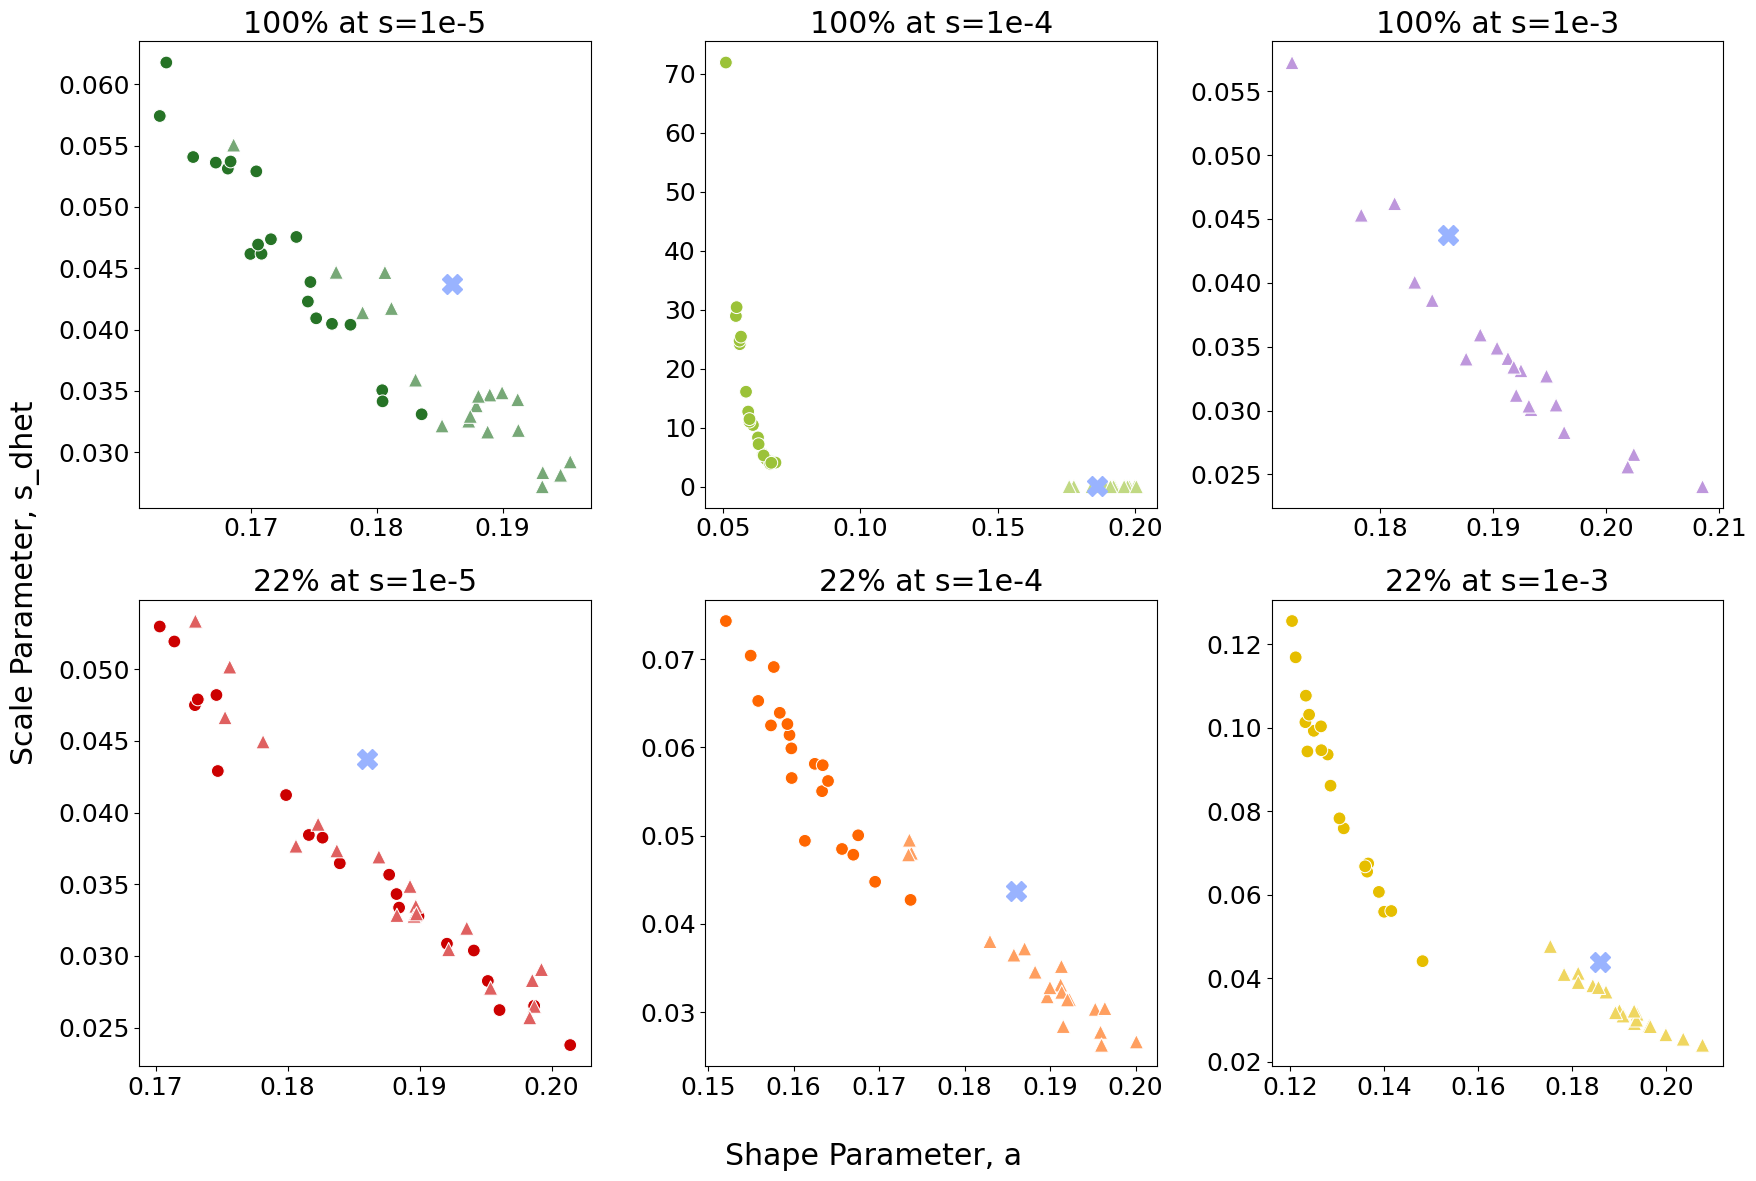

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(18,12), tight_layout=True) #constrained_layout=True or tight_layout=True, sharey=True
fig.supxlabel('Shape Parameter, a')
fig.supylabel('Scale Parameter, s_dhet')


#Add one plot at a time

#E5 flat
ax_curr=axs[0,0]
order_plotting=['E5', 'E5ZeroSyn']
#Subset the data 
DFE_dataframe_subset=DFE_dataframe.loc[DFE_dataframe['Condition'].isin(order_plotting)]
sbn.scatterplot(data=DFE_dataframe_subset, x="Shape_Param", y="s_dhet", hue='Condition', style='Condition',
                sizes=[85,105], palette=color_conditions, hue_order=order_plotting, ax=ax_curr, legend=False,
                size='Condition', markers=model_tips)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('100% at s=1e-5')


#E4 flat
ax_curr=axs[0,1]
order_plotting=['E4', 'E4ZeroSyn']
#Subset the data 
DFE_dataframe_subset=DFE_dataframe.loc[DFE_dataframe['Condition'].isin(order_plotting)]
sbn.scatterplot(data=DFE_dataframe_subset, x="Shape_Param", y="s_dhet", hue='Condition', style='Condition',
                sizes=[85,105], palette=color_conditions, hue_order=order_plotting, ax=ax_curr, legend=False,
                size='Condition', markers=model_tips)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('100% at s=1e-4')


#E3 flat
ax_curr=axs[0,2]
order_plotting=['E3ZeroSyn'] #'E3',
#Subset the data 
DFE_dataframe_subset=DFE_dataframe.loc[DFE_dataframe['Condition'].isin(order_plotting)]
sbn.scatterplot(data=DFE_dataframe_subset, x="Shape_Param", y="s_dhet", hue='Condition', style='Condition',
                sizes=[105], palette=color_conditions, hue_order=order_plotting, ax=ax_curr, legend=False,
               size='Condition', markers=model_tips)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('100% at s=1e-3')


#Add one plot at a time
ax_curr=axs[1,0]
order_plotting=['E5_Partial', 'E5Partial_ZeroSyn']
#Subset the data 
DFE_dataframe_subset=DFE_dataframe.loc[DFE_dataframe['Condition'].isin(order_plotting)]
sbn.scatterplot(data=DFE_dataframe_subset, x="Shape_Param", y="s_dhet", hue='Condition', style='Condition',
                sizes=[85,105], palette=color_conditions, hue_order=order_plotting, ax=ax_curr, legend=False,
               size='Condition', markers=model_tips)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('22% at s=1e-5')


#Add one plot at a time
ax_curr=axs[1,1]
order_plotting=['E4_Partial', 'E4Partial_ZeroSyn']
#Subset the data 
DFE_dataframe_subset=DFE_dataframe.loc[DFE_dataframe['Condition'].isin(order_plotting)]
sbn.scatterplot(data=DFE_dataframe_subset, x="Shape_Param", y="s_dhet", hue='Condition', style='Condition',
                sizes=[85,105], palette=color_conditions, hue_order=order_plotting, ax=ax_curr, legend=False,
               size='Condition', markers=model_tips)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('22% at s=1e-4')


#Add one plot at a time
ax_curr=axs[1,2]
order_plotting=['E3_Partial', 'E3Partial_ZeroSyn']
#Subset the data 
DFE_dataframe_subset=DFE_dataframe.loc[DFE_dataframe['Condition'].isin(order_plotting)]
sbn.scatterplot(data=DFE_dataframe_subset, x="Shape_Param", y="s_dhet", hue='Condition', 
                sizes=[85,105], palette=color_conditions, hue_order=order_plotting, ax=ax_curr, legend=False, style='Condition',
               size='Condition', markers=model_tips)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('22% at s=1e-3')

plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots_Revision/SuppFig14.jpg", bbox_inches='tight', dpi=300)

# Grid Figure with empty circles

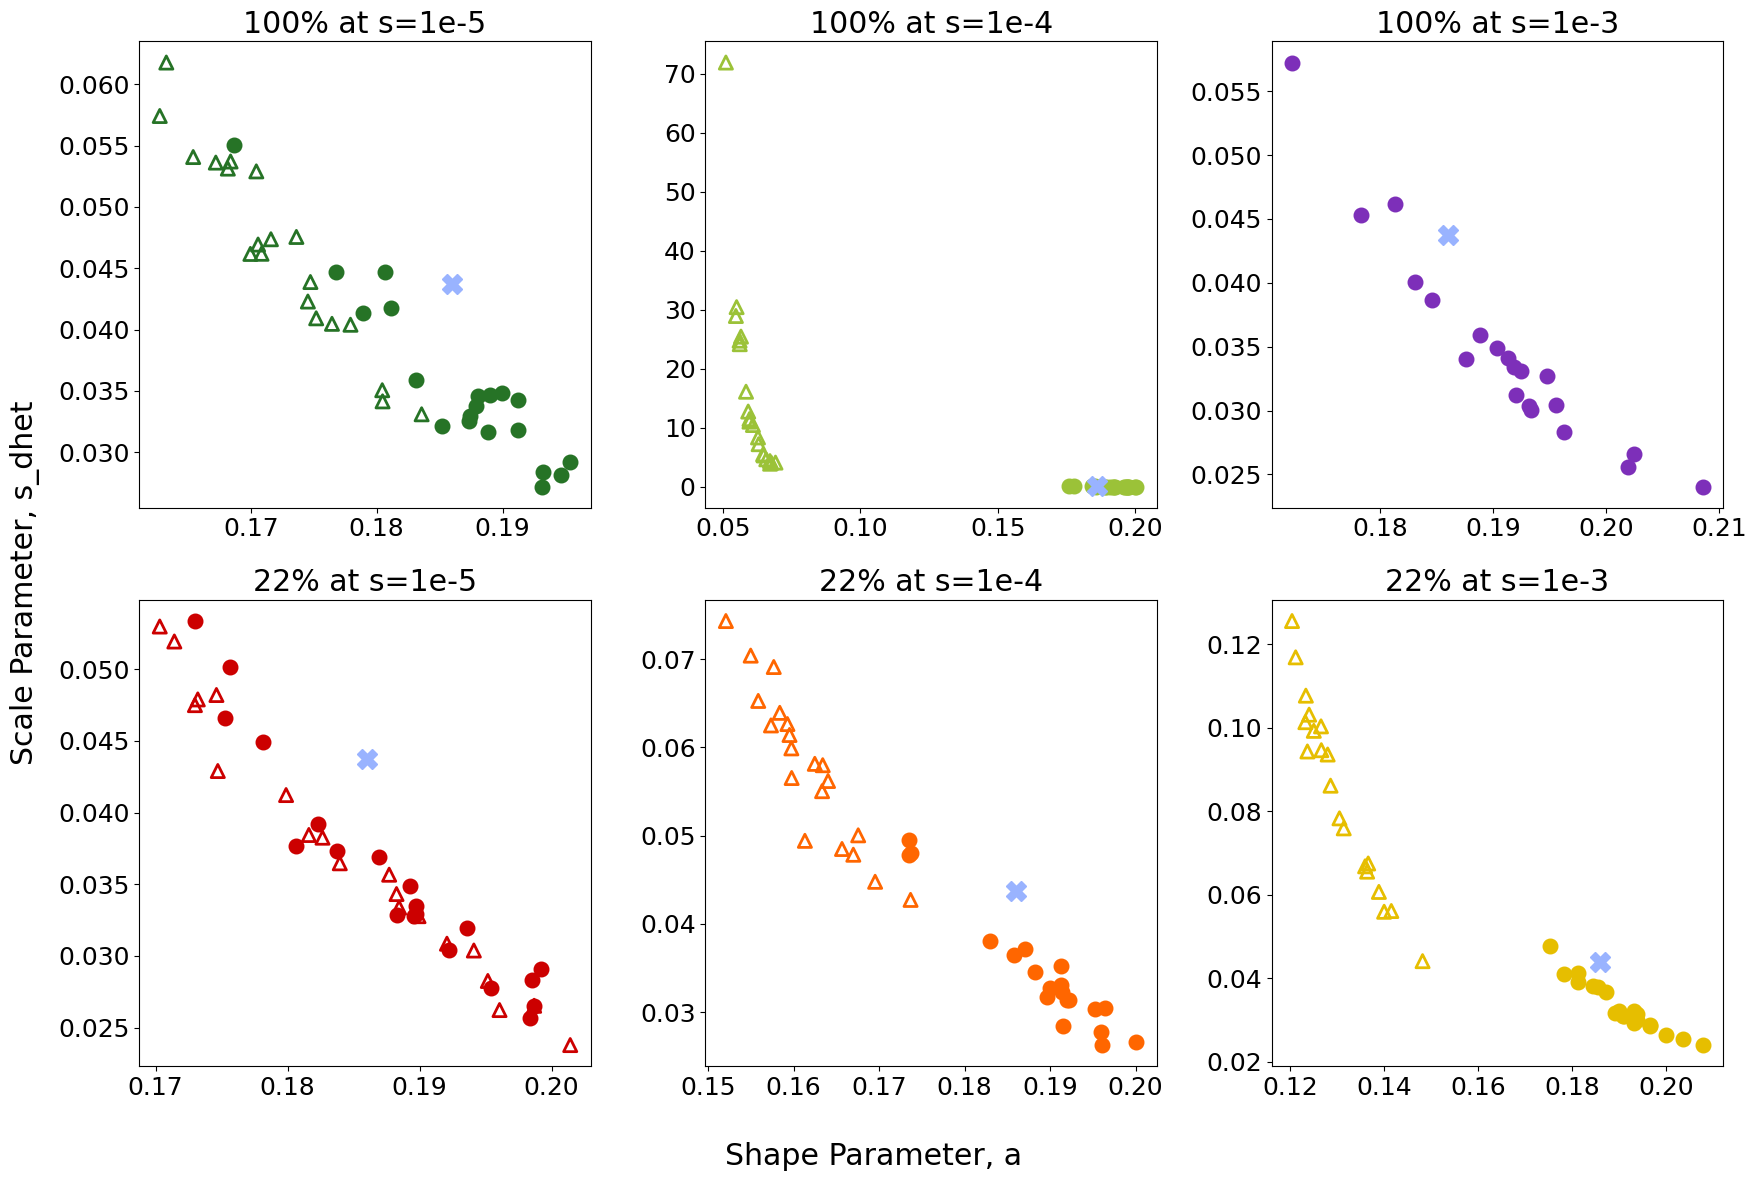

In [33]:
fig, axs = plt.subplots(2, 3, figsize=(18,12), tight_layout=True) #constrained_layout=True or tight_layout=True, sharey=True
fig.supxlabel('Shape Parameter, a')
fig.supylabel('Scale Parameter, s_dhet')


#Add one plot at a time

#E5 flat
ax_curr=axs[0,0]
order_plotting=['E5', 'E5ZeroSyn']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]
ax_curr.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax_curr.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('100% at s=1e-5')


#E4 flat
ax_curr=axs[0,1]
order_plotting=['E4', 'E4ZeroSyn']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]
ax_curr.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax_curr.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('100% at s=1e-4')


#E3 flat
ax_curr=axs[0,2]
order_plotting=['E3', 'E3ZeroSyn']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]
ax_curr.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax_curr.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('100% at s=1e-3')


#Add one plot at a time
ax_curr=axs[1,0]
order_plotting=['E5_Partial', 'E5Partial_ZeroSyn']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]
ax_curr.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax_curr.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('22% at s=1e-5')


#Add one plot at a time
ax_curr=axs[1,1]
order_plotting=['E4_Partial', 'E4Partial_ZeroSyn']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]
ax_curr.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax_curr.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('22% at s=1e-4')


#Add one plot at a time
ax_curr=axs[1,2]
order_plotting=['E3_Partial', 'E3Partial_ZeroSyn']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]
ax_curr.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax_curr.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('')
ax_curr.set_xlabel('')
ax_curr.set_title('22% at s=1e-3')

plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots/Fig4EmptyCircles.jpg", bbox_inches='tight', dpi=300)

## Insets

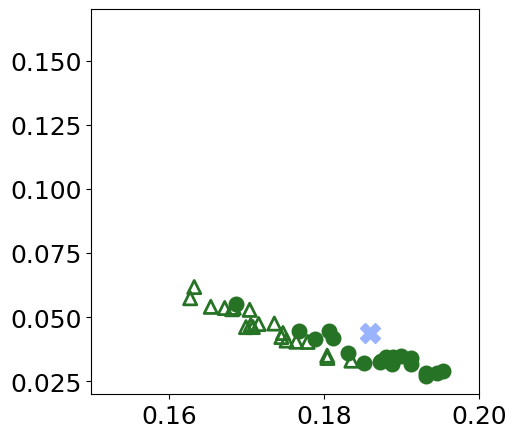

In [34]:
order_plotting=['E5', 'E5ZeroSyn']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]

#Generate an insert
fig=plt.figure(figsize=[5,5])
ax=plt.gca()
plt.rcParams['font.size'] = '18'
ax.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])

plt.xlabel("")
plt.ylabel("")
plt.xlim(0.15, 0.2)
plt.ylim(0.02,0.17)

condition=order_plotting[0] 
plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots/Fig4Insert"+condition+".jpg", bbox_inches='tight', dpi=300)

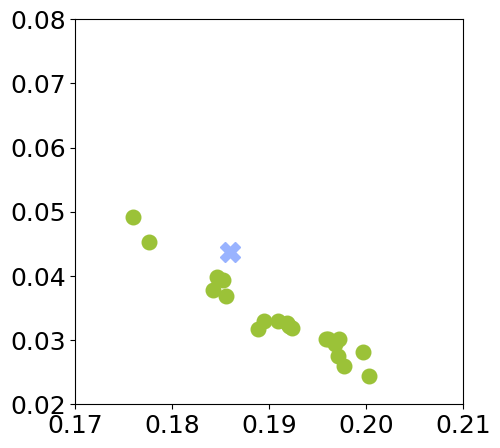

In [35]:
order_plotting=['E4', 'E4ZeroSyn']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]

#Generate an insert
fig=plt.figure(figsize=[5,5])
ax=plt.gca()
plt.rcParams['font.size'] = '18'
ax.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])

plt.xlabel("")
plt.ylabel("")
plt.xlim(0.17, 0.21)
plt.ylim(0.02,0.08)

condition=order_plotting[0] 
plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots/Fig4Insert"+condition+".jpg", bbox_inches='tight', dpi=300)

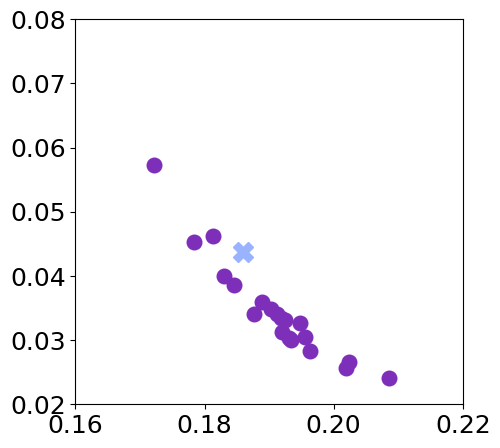

In [36]:
order_plotting=['E3', 'E3ZeroSyn']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]

#Generate an insert
fig=plt.figure(figsize=[5,5])
ax=plt.gca()
plt.rcParams['font.size'] = '18'
ax.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])

plt.xlabel("")
plt.ylabel("")
plt.xlim(0.16, 0.22)
plt.ylim(0.02,0.08)

condition=order_plotting[0] 
plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots/Fig4Insert"+condition+".jpg", bbox_inches='tight', dpi=300)

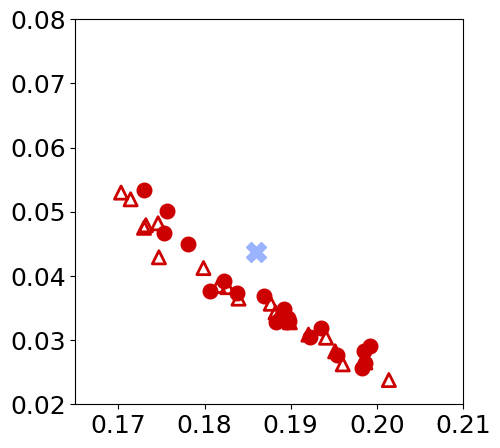

In [37]:
order_plotting=['E5_Partial', 'E5Partial_ZeroSyn']
#Subset the data 
DFE_dataframe_subset_1=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[0]]
DFE_dataframe_subset_2=DFE_dataframe.loc[DFE_dataframe['Condition']==order_plotting[1]]

#Generate an insert
fig=plt.figure(figsize=[5,5])
ax=plt.gca()
plt.rcParams['font.size'] = '18'
ax.scatter(DFE_dataframe_subset_1.Shape_Param, DFE_dataframe_subset_1.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               marker='^', facecolors='none', linewidths=2)
ax.scatter(DFE_dataframe_subset_2.Shape_Param, DFE_dataframe_subset_2.s_dhet, s=90, edgecolors=color_conditions[order_plotting[0]],
               facecolors=color_conditions[order_plotting[0]], linewidths=2)
ax.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])

plt.xlabel("")
plt.ylabel("")
plt.xlim(0.165, 0.21)
plt.ylim(0.02,0.08)

condition=order_plotting[0] 
plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots/Fig4Insert"+condition+".jpg", bbox_inches='tight', dpi=300)

## Generate legend

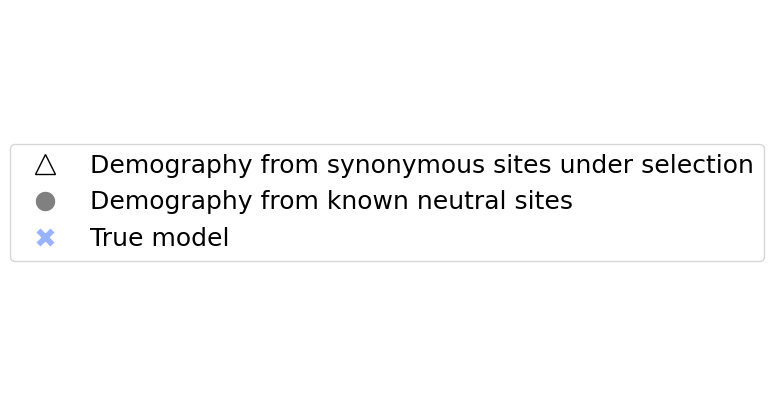

In [42]:
fig= plt.figure(figsize=[5,5])
ax=plt.gca()

legend_elements=[Line2D([0], [0], marker='^', color='w', label='Demography from synonymous sites under selection',
                          markerfacecolor='w', markersize=15, markeredgecolor='0'),
                Line2D([0], [0], marker='o', color='w', label='Demography from known neutral sites',
                          markerfacecolor='0.5', markersize=15),
                Line2D([0], [0], marker='X', color='w', label='True model',
                          markerfacecolor='#99b3ff', markersize=15)]

ax.legend(handles=legend_elements, loc='center')

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()

plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots_Revision/SupplFig14Legend.jpg", bbox_inches='tight', dpi=300)

## Supplementary Figure 15

In [39]:
dfe_parameters_data.keys()

dict_keys(['Neutral', 'E4', 'E3', 'E5', 'E5_Partial', 'E3_Partial', 'E4_Partial', 'E5ZeroSyn', 'E5Partial_ZeroSyn', 'E4ZeroSyn', 'E4Partial_ZeroSyn', 'E3ZeroSyn', 'E3Partial_ZeroSyn'])

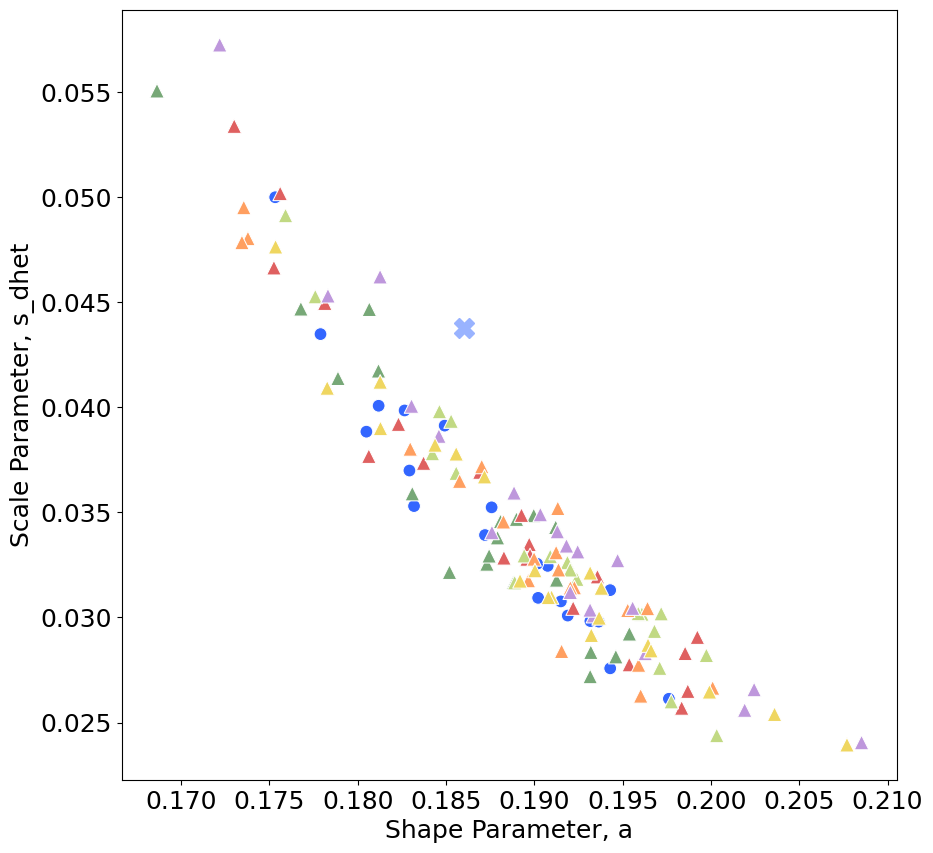

In [40]:
order_plotting=['Neutral', 'E5ZeroSyn', 'E5Partial_ZeroSyn', 'E4ZeroSyn', 'E4Partial_ZeroSyn', 'E3ZeroSyn', 'E3Partial_ZeroSyn']

fig=plt.figure(figsize=[10,10])
ax_curr=plt.gca()
plt.rcParams['font.size'] = '18'

DFE_dataframe_subset=DFE_dataframe.loc[DFE_dataframe['Condition'].isin(order_plotting)]
sbn.scatterplot(data=DFE_dataframe_subset, x="Shape_Param", y="s_dhet", hue='Condition', style='Condition',
                palette=color_conditions, hue_order=order_plotting, ax=ax_curr, legend=False, markers=model_tips,
                sizes=[85,110,110,110,110,110,110],size='Condition')
ax_curr.plot(shape_true, s_dhet_true, 'X', ms=15, color=color_conditions['SLiM_True_DFE'])
ax_curr.set_ylabel('Scale Parameter, s_dhet')
ax_curr.set_xlabel('Shape Parameter, a')
#ax_curr.set_title('100% at s=1e-5')

plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots_Revision/SuppFig15.jpg", bbox_inches='tight', dpi=300)

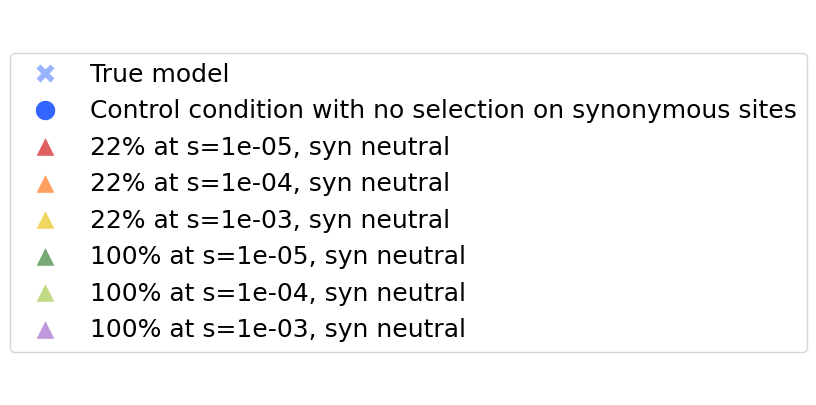

In [41]:
fig= plt.figure(figsize=[5,5])
ax=plt.gca()

legend_elements=[Line2D([0], [0], marker='X', color='w', label='True model',
                          markerfacecolor='#99b3ff', markersize=15),
                Line2D([0], [0], marker='o', color='w', label='Control condition with no selection on synonymous sites',
                          markerfacecolor=color_conditions['Neutral'], markersize=15),
                Line2D([0], [0], marker='^', color='w', label=title_conditions['E5Partial_ZeroSyn'],
                          markerfacecolor=color_conditions['E5Partial_ZeroSyn'], markersize=15),
                Line2D([0], [0], marker='^', color='w', label=title_conditions['E4Partial_ZeroSyn'],
                          markerfacecolor=color_conditions['E4Partial_ZeroSyn'], markersize=15),
                Line2D([0], [0], marker='^', color='w', label=title_conditions['E3Partial_ZeroSyn'],
                          markerfacecolor=color_conditions['E3Partial_ZeroSyn'], markersize=15),
                Line2D([0], [0], marker='^', color='w', label=title_conditions['E5ZeroSyn'],
                          markerfacecolor=color_conditions['E5ZeroSyn'], markersize=15),
                Line2D([0], [0], marker='^', color='w', label=title_conditions['E4ZeroSyn'],
                          markerfacecolor=color_conditions['E4ZeroSyn'], markersize=15),
                Line2D([0], [0], marker='^', color='w', label=title_conditions['E3ZeroSyn'],
                          markerfacecolor=color_conditions['E3ZeroSyn'], markersize=15)]

ax.legend(handles=legend_elements, loc='center')

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots_Revision/SupplFig15Legend.jpg", bbox_inches='tight', dpi=300)

## Check Values

In [21]:
DFE_dataframe[DFE_dataframe['Condition']=='E5_Partial']

,Condition,Replicate_ID,Shape_Param,Scale_Param,Syn_Theta,Na,s_dhet
60,E5_Partial,1,0.174605,890.970996,5393.689750,9240.775646,0.048209
61,E5_Partial,2,0.188250,668.663886,5686.420880,9742.299244,0.034318
62,E5_Partial,3,0.201411,462.792997,5680.046618,9731.378497,0.023778
63,E5_Partial,4,0.179882,762.516951,5397.847083,9247.898224,0.041226
64,E5_Partial,5,0.187692,128.368506,1050.313436,1799.456637,0.035669
65,E5_Partial,6,0.188444,628.283702,5494.221138,9413.011730,0.033373
66,E5_Partial,7,0.174708,748.755479,5093.210184,8725.976985,0.042904
67,E5_Partial,8,0.192069,611.331912,5782.614283,9907.103246,0.030853
68,E5_Partial,9,0.181607,743.586677,5645.388948,9672.001008,0.038440
69,E5_Partial,10,0.198677,520.703953,5730.074914,9817.089815,0.026520
